# Phases

Expected phases models(values expressed in radiants):
$$ \phi_R = \arctan{\frac{1 - \omega^2 L C}{R \omega C}}$$
$$ \phi_R = \arctan{\frac{1 - \omega^2 L C}{R \omega C}} + \frac{\pi}{2}$$
$$ \phi_R = \arctan{\frac{1 - \omega^2 L C}{R \omega C}} - \frac{\pi}{2}$$

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt

from lmfit import Model

In [22]:
file_folder = 'data/sample data/'
file_name = 'phases.csv'
data_file = file_folder + file_name
x,phaseF,phaseR,phaseL,phaseC  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0,1,2,3,4), unpack = True)
#converting to radians
phaseF*= np.pi / 180
phaseR*= np.pi / 180
phaseL*= np.pi / 180
phaseC*= np.pi / 180

phaseF

array([-0.09011379, -0.09771435, -0.09181811, -0.09540842, -0.09526129,
       -0.09277106, -0.09387655, -0.09340077, -0.09375647, -0.09219335,
       -0.0919059 , -0.08771344, -0.09158214, -0.09138439, -0.09361196,
       -0.09118787, -0.09095975, -0.09127531, -0.09053983, -0.09874218,
       -0.08740975, -0.08915404, -0.08768168, -0.08958286, -0.08625208,
       -0.09066252, -0.09241222, -0.08934724, -0.08690047, -0.08804331,
       -0.08696068, -0.09136327, -0.08845782, -0.08764782, -0.08742023,
       -0.09093881, -0.09224903, -0.08622171, -0.08281308, -0.08650794,
       -0.08746438, -0.08982581, -0.09347722, -0.08700187, -0.08759197,
       -0.08787   , -0.08822988, -0.0893448 , -0.08675177, -0.08765724,
       -0.08826968, -0.08668457, -0.08569183, -0.08506839, -0.08631491,
       -0.09247976, -0.08264727, -0.08687586, -0.08565011, -0.09081192,
       -0.08811783, -0.08366218, -0.08391822, -0.08843636, -0.08699245,
       -0.08379989, -0.08620618, -0.08504204, -0.08649887, -0.08

R

[[Model]]
    Model(R_phase_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 60
    # data points      = 802
    # variables        = 3
    chi-square         = 83.3283266
    reduced chi-square = 0.10429077
    Akaike info crit   = -1809.98469
    Bayesian info crit = -1795.92336
[[Variables]]
    R:  2999.99867 +/- 72454739.1 (2415159.04%) (init = 1174)
    L:  0.03532534 +/- 4156.83889 (11767300.97%) (init = 0.0472)
    C:  1.8313e-09 +/- 2.1540e-04 (11761758.12%) (init = 1.47e-09)
[[Correlations]] (unreported correlations are < 0.100)
    C(L, C) = -1.000
    C(R, L) = 1.000
    C(R, C) = -1.000
L

[[Model]]
    Model(L_phase_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 802
    # variables        = 3
    chi-square         = 391.785628
    reduced chi-square = 0.49034497
    Akaike info crit   = -568.547816
    Bayesian info crit = -554.486490
##  Warning: uncertainties could no

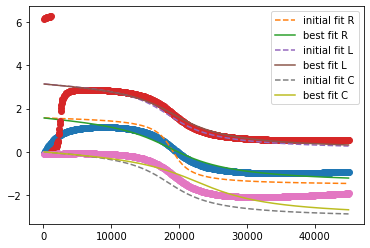

In [23]:
from lmfit import Parameters

paramsF = Parameters()
paramsR = Parameters()
paramsL = Parameters()
paramsC = Parameters()

paramsF.add('phi_f',0.0, min=-1.0,max=1.0)

paramsR.add('R', 1.174e3,min=1.0, max=3e03)
paramsR.add('L', 0.0472, min=3.0e-02, max=5.5e-02)
paramsR.add('C', 1.47e-09, min=1e-09, max=2e-09)

paramsL.add('R', 174e3,min=1.5e03, max=3e03)
paramsL.add('L', 0.0472, min=3.0e-02, max=5.5e-02)
paramsL.add('C', 1.47e-09, min=1e-09, max=2e-09)

paramsC.add('R', 174e3,min=1.5e03, max=3e03)
paramsC.add('L', 4.72e-02, min=3.0e-02, max=5.5e-02)
paramsC.add('C', 1.47e-09, min=1e-09, max=2e-09)

def F_phase_model(x,phi_F):
    return phi_F

def R_phase_model(x, R, L, C):
    num = 1 - (2 * np.pi * x)**2 * L * C
    den = R * (2 * np.pi * x) * C
    return np.arctan(num / den)


def L_phase_model(x, R, L, C):
    num = 1 - (2 * np.pi * x)**2 * L * C
    den = R * (2 * np.pi * x) * C
    return np.arctan(num / den) + np.pi/2

def C_phase_model(x, R, L, C):
    num = 1 - (2 * np.pi * x)**2 * L * C
    den = R * (2 * np.pi * x) * C
    return np.arctan(num / den) - np.pi/2


Fmodel = Model(F_phase_model)
Rmodel = Model(R_phase_model)
Lmodel = Model(L_phase_model)
Cmodel = Model(C_phase_model)

# resultF = Fmodel.fit(phaseF,x=x,params=paramsF)
resultR = Rmodel.fit(phaseR, x=x, params=paramsR)
resultL = Lmodel.fit(phaseL, x=x, params=paramsL)
resultC = Cmodel.fit(phaseC, x=x, params=paramsC)

# print('F\n')
# print(resultF.fit_report())
print('R\n')
print(resultR.fit_report())
print('L\n')
print(resultL.fit_report())
print('C\n')
print(resultC.fit_report())
# plt.plot(x, phaseF, 'o')
# plt.plot(x, resultF.init_fit, '--', label='initial fit F')
# plt.plot(x, resultF.best_fit, '-', label='best fit F')
plt.plot(x, phaseR, 'o')
plt.plot(x, resultR.init_fit, '--', label='initial fit R')
plt.plot(x, resultR.best_fit, '-', label='best fit R')
plt.plot(x, phaseL, 'o')
plt.plot(x, resultL.init_fit, '--', label='initial fit L')
plt.plot(x, resultL.best_fit, '-', label='best fit L')
plt.plot(x, phaseC, 'o')
plt.plot(x, resultC.init_fit, '--', label='initial fit C')
plt.plot(x, resultC.best_fit, '-', label='best fit C')
plt.legend()

plt.savefig('figs/phases-gabriele.pdf')
plt.show()